In [1]:
using Plots
using Random
using LaTeXStrings
include("../inflationBasicEqs.jl")
include("../inflationSDE.jl")
include("../sampling.jl")
include("../fitting.jl")

FitByBinAve (generic function with 1 method)

In [2]:
Random.seed!(1)

TaskLocalRNG()

In [3]:
# We consider y=1-x, where x is in Eq. (4.15) in 2012.02031.
# y is a reflected Brownian motion with a reflective boundary at y=0 and an absorbing boundary at y=1
# y is simulated as |W(N)|, the absolute value of the standard Brownian motion W, which stops when |W|=1 (c.f. https://doi.org/10.1214/aoap/1177004597 p.891 §4.5)
dN = 0.001
mu = sqrt(7)
yIni = 0.0
vIni = 0.0
nPath = 1000000
iniVec = [yIni, vIni]

function drift!(driftVec, u, p, t)
    driftVec .= 0.0
end

b = 1.0 - 0.5826 * sqrt(2.0) / mu * sqrt(dN)

function vol!(volVec, u, p, t)
    if abs(u[1]) < b
        volVec[1] = sqrt(2.0) / mu
        volVec[2] = 0
    else
        volVec .= 0.0
    end
end

vol! (generic function with 1 method)

In [4]:
NsPsMin = 2.0
NsPsMax = 8.0
NSimEnd = 60.0

60.0

In [29]:
NTotFilePath = "NTot.csv"
NTotDf = SampleNTotAdd2Paths(nPath, iniVec, NSimEnd, [NsPsMin, NsPsMax], drift!, vol!, dN, NTotFilePath)

iPath=1 :2025-05-02T12:24:31.256
iPath=1001 :2025-05-02T12:24:59.289
iPath=2001 :2025-05-02T12:25:25.452
iPath=3001 :2025-05-02T12:25:54.126
iPath=4001 :2025-05-02T12:26:20.151
iPath=5001 :2025-05-02T12:26:48.883
iPath=6001 :2025-05-02T12:27:15.420
iPath=7001 :2025-05-02T12:27:41.715
iPath=8001 :2025-05-02T12:28:08.680
iPath=9001 :2025-05-02T12:28:35.384
iPath=10001 :2025-05-02T12:29:02.264
iPath=11001 :2025-05-02T12:29:32.593
iPath=12001 :2025-05-02T12:30:01.713
iPath=13001 :2025-05-02T12:30:28.072
iPath=14001 :2025-05-02T12:30:54.311
iPath=15001 :2025-05-02T12:31:21.086
iPath=16001 :2025-05-02T12:31:48.702
iPath=17001 :2025-05-02T12:32:15.351
iPath=18001 :2025-05-02T12:32:41.953
iPath=19001 :2025-05-02T12:33:21.547
iPath=20001 :2025-05-02T12:34:24.898
iPath=21001 :2025-05-02T12:35:14.215
iPath=22001 :2025-05-02T12:35:40.723
iPath=23001 :2025-05-02T12:36:07.450
iPath=24001 :2025-05-02T12:36:34.872
iPath=25001 :2025-05-02T12:37:02.870
iPath=26001 :2025-05-02T12:37:30.885
iPath=27001 :2

Row,NBk,NTot1,NTot2,phi_vel_vec_elem1,phi_vel_vec_elem2
,Float64,Float64,Float64,Float64,Float64
1,4.09545,0.611,1.486,0.0,0.0
2,3.15685,2.195,0.598,0.0,0.0
3,3.00627,6.361,9.158,-0.410097,0.0
4,2.0081,8.652,11.045,0.0515165,0.0
5,2.07477,3.385,4.723,0.159887,0.0
6,5.73929,2.213,9.322,0.0,0.0
7,7.40204,7.695,3.479,0.0801975,0.0
8,6.38331,1.774,3.466,0.0,0.0
9,5.96855,1.556,0.868,0.0,0.0


In [6]:
fitResult, delNSqFit, psFit, delNSqErr, psErr = FitByLS(NTotDf, "exp+const", 1, NsPsMin, NsPsMax, basisFuncType="monomialExcept0th", paramIni=[8.1, -0.1, -0.5])

(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([8.170457925533384, -0.7986589266520047, -0.5699347878155472], [7.710260255683135, 6.7631300582452125, 4.114890670456315, 5.052950638745838, 7.03053399798147, -17.12880576030517, -0.7286247594717832, 6.71801870203373, 7.907176952289216, 7.569417823754939  …  4.352535613421586, 4.675480088583878, -8.433160764198545, 8.021485022676496, 5.532212601476914, 2.536494027820593, 4.797133768539436, 3.669011914073314, -15.03554099594402, 2.424474149834718], [1.0 0.09689388957899144 -0.3169270116295079; 1.0 0.16543152887834775 -0.41709347993037105; … ; 1.0 0.056570984137603274 -0.22769501773606668; 1.0 0.14771170992026175 -0.39586847737353104], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[]), var"#102#186"(Core.Box(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vecto

In [7]:
fitResult.param

3-element Vector{Float64}:
  8.170457925533384
 -0.7986589266520047
 -0.5699347878155472

In [8]:
confidence_interval(fitResult, 0.05)

3-element Vector{Tuple{Float64, Float64}}:
 (8.061272489572884, 8.279643361493884)
 (-2.297426909405235, 0.7001090561012254)
 (-1.4489907067741643, 0.30912113114307005)

In [9]:
confidence_interval(fitResult, 0.32)

3-element Vector{Tuple{Float64, Float64}}:
 (8.115058825883615, 8.225857025183153)
 (-1.5591119678292853, -0.038205885474724144)
 (-1.015954955466162, -0.12391462016493232)

In [10]:
NsPS = LinRange(NsPsMin, NsPsMax, 100)
delNSqFitVals = [delNSqFit(N) for N in NsPS]
psFitVals = [psFit(N) for N in NsPS]
delNSqErrVals = [delNSqErr(N) for N in NsPS]
psErrVals = [psErr(N) for N in NsPS]

100-element Vector{Float64}:
 0.12413657413991683
 0.11630917260778394
 0.10888359987362768
 0.10184241992159117
 0.09516900848507798
 0.08884753082153393
 0.08286292220805613
 0.07720087139526927
 0.07184780730926181
 0.06679088934812867
 0.06201800167749479
 0.05751775198146477
 0.053279475159031295
 ⋮
 0.011206630451226565
 0.01100644871230685
 0.010807024838880562
 0.010608531491931928
 0.010411129317969498
 0.010214967509307164
 0.010020184346161861
 0.009826907720457379
 0.009635255641340823
 0.00944533672251518
 0.009257250651571404
 0.009071088641569329

In [11]:
NBksBin = LinRange(NsPsMin, NsPsMax, 11)
delNSqBinAve, psBinAve, delNSqBinAveErr, psBinAveErr, NBksdelNSq, NBksPS = FitByBinAve(NTotDf, NBksBin)

(Any[7.939263254723056, 8.071527213902634, 8.081953117100092, 8.014827374849595, 8.112537191521572, 8.130639442712765, 8.142624581981456, 8.199611419080291, 8.186216926531813, 8.10278496644805], [0.22043993196596257, 0.017376505329096396, -0.11187623708416079, 0.16284969445329378, 0.03017041865198835, 0.019975232114486364, 0.09497806183139143, -0.022324154247463902, -0.13905326680627111], Any[0.056943970052145174, 0.05836017121248629, 0.05720755515141959, 0.05599507422406209, 0.05720995938467448, 0.05698324958732386, 0.05789138039063562, 0.056766532830105465, 0.05650665132271879, 0.05695837132739508], [0.13589748290173978, 0.13620464536001844, 0.13341823030273525, 0.13342109393189752, 0.13457825260097378, 0.1353852800248292, 0.1351321490357238, 0.13349407907447042, 0.13372087126191806], LinRange{Float64}(2.3, 7.7, 10), LinRange{Float64}(2.5999999999999996, 7.4, 9))

In [12]:
function delNSqFlatAnalytic(Nbk)
    exponent = pi^2 / mu^2 * Nbk
    q = exp(-exponent)
    nCutoff = 10
    firstTerm = 4 * mu^2 / 3 * 2 * sum([-(mu / pi / (n + 0.5))^2 * q^((n + 0.5)^2) for n in 0:nCutoff])
    secondTerm = 8 * mu^2 / pi^3 * sum([-(mu / pi / (n + 0.5))^2 * q^((n + 0.5)^2) / (n + 0.5)^2 * (5 * (-1)^n / (n + 0.5) - 4 * pi) for n in 0:nCutoff])
    return firstTerm + secondTerm + mu^4 / 6
end

delNSqAnals = [delNSqFlatAnalytic(N) for N in NsPS]

100-element Vector{Float64}:
 7.986315997147766
 7.990630463317828
 7.9947658348133395
 7.99874127385182
 8.00257284741291
 8.00627406347262
 8.009856313444747
 8.013329237279912
 8.016701024775259
 8.019978664266436
 8.023168147912337
 8.026274641168545
 8.029302622714209
 ⋮
 8.139643555236315
 8.140214721474855
 8.140773815418664
 8.141321092231012
 8.141856801681868
 8.142381188261906
 8.142894491294117
 8.143396945043033
 8.143888778821678
 8.14437021709621
 8.14484147958839
 8.14530278137586

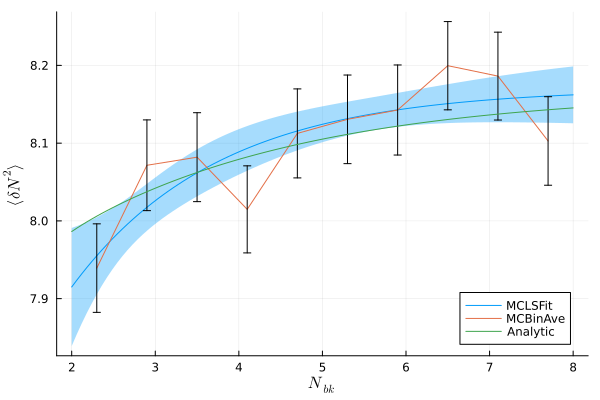

In [13]:
plot(NsPS, delNSqFitVals, ribbon = delNSqErrVals, fillalpha = 0.35, label="MCLSFit")
plot!(NBksdelNSq, delNSqBinAve, yerror = delNSqBinAveErr, label="MCBinAve", legend=:bottomright, xlabel=L"N_{bk}", ylabel=L"\langle \delta N^2 \rangle")
plot!(NsPS, delNSqAnals, label="Analytic")

In [15]:
function PSFlatAnalytic(Nbk)
    exponent = pi^2 / mu^2 * Nbk
    q = exp(-exponent)
    nCutoff = 10
    firstTerm = 4 * mu^2 / 3 * 2 * sum([q^((n + 0.5)^2) for n in 0:nCutoff])
    secondTerm = 8 * mu^2 / pi^3 * sum([q^((n + 0.5)^2) / (n + 0.5)^2 * (5 * (-1)^n / (n + 0.5) - 4 * pi) for n in 0:nCutoff])
    return firstTerm + secondTerm
end

psAnals = [PSFlatAnalytic(N) for N in NsPS[2:end]]

99-element Vector{Float64}:
 0.06965370725722231
 0.06686607038929182
 0.06436745538984212
 0.062111498031010015
 0.06005985845409256
 0.058180818066334794
 0.05644812240553332
 0.05484002670729016
 0.0533385085779452
 0.05192861846165453
 0.05059794375149895
 0.04933616663899976
 0.04813469928999403
 ⋮
 0.009525265395842197
 0.009323937294162699
 0.009126864518464561
 0.008933957125086156
 0.00874512707181796
 0.008560288177643427
 0.008379356083348277
 0.008202248212966667
 0.00802888373605426
 0.007859183530761538
 0.007693070147696934
 0.007530467774553795

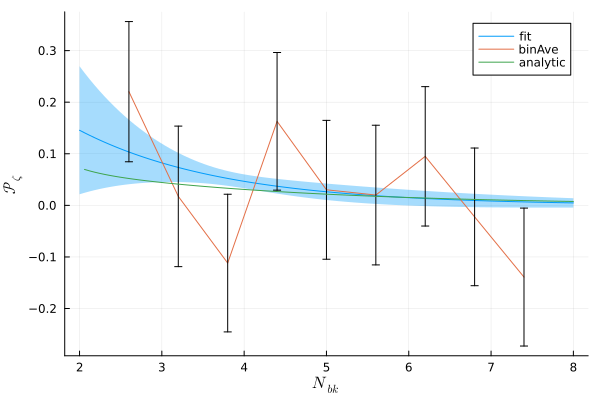

In [16]:
plot(NsPS, psFitVals, ribbon = psErrVals, fillalpha = 0.35, label="fit")
plot!(NBksPS, psBinAve, yerror = psBinAveErr, label="binAve", legend=:topright, xlabel=L"N_{bk}", ylabel=L"\mathcal{P}_\zeta")
plot!(NsPS[2:end], psAnals, label="analytic")

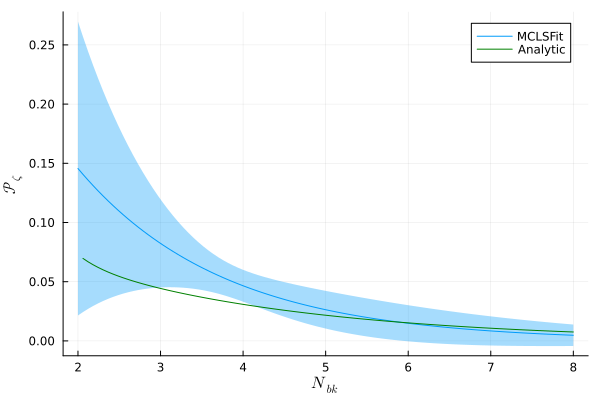

In [17]:
plot(NsPS, psFitVals, ribbon = psErrVals, fillalpha = 0.35, label="MCLSFit")
plot!(NsPS[2:end], psAnals, label="Analytic", legend=:topright, xlabel=L"N_{bk}", ylabel=L"\mathcal{P}_\zeta", color = :green)